In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
! kaggle competitions download -c 'nlp-getting-started'

Saving kaggle.json to kaggle.json
ref                                                         title                                             size  lastUpdated          downloadCount  
----------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  
roche-data-science-coalition/uncover                        UNCOVER COVID-19 Challenge                       179MB  2020-05-21 18:57:53          16177  
rohanrao/chai-time-data-science                             Chai Time Data Science | CTDS.Show                 3MB  2020-06-20 23:01:09            423  
mrgeislinger/bart-ridership                                 BART Ridership                                   325MB  2020-07-09 22:28:07             15  
moezabid/zillow-all-homes-data                              Zillow All Homes Data                              5MB  2020-07-18 11:44:48             76  
tanmoyx/covid19-patient-precondition-dataset    

In [ ]:
!pip install SpellChecker
!pip install nlppreprocess
!pip install autocorrect
import pandas as pd
from keras.datasets import imdb
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer  
from keras.preprocessing.sequence import pad_sequences
from keras import models
from keras import layers
from keras import losses
from keras import metrics
from keras import optimizers
from keras.utils import plot_model

import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import seaborn as sns
from collections import Counter
from pathlib import Path
import os
import numpy as np
import re
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import wordnet
import unicodedata
import html
stop_words = stopwords.words('english')



import re
from nltk.stem.isri import ISRIStemmer
from textblob import Word, TextBlob
from autocorrect import spell
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string
from nlppreprocess import NLP
# from spellchecker import SpellChecker

     |████████████████████████████████| 3.9MB 2.1MB/s 
  Created wheel for SpellChecker: filename=spellchecker-0.4-cp36-none-any.whl size=3966516 sha256=6b38d2b3e2973967e2d05049d54d716c2d99922218a5590bfe2fa4fae41e9b95
  Stored in directory: /root/.cache/pip/wheels/a2/e6/ad/28ab959cba7100f5c562a3d1711cd34b630734d241c4e1bd40
  Created wheel for inexactsearch: filename=inexactsearch-1.0.2-cp36-none-any.whl size=7113 sha256=92d8dd709f8ddb91f831eb09c2996a821ea7bc5e13eecc70c959e1f84dee1830
  Stored in directory: /root/.cache/pip/wheels/58/e0/c1/e3fed0e9fd1a3708bc91870fb0ba30ef88527540006763674b
  Created wheel for soundex: filename=soundex-1.1.3-cp36-none-any.whl size=8862 sha256=422107c879b72cc4bab2a6e329174686958a76c571cb920ba3cd724b7d77d950
  Stored in directory: /root/.cache/pip/wheels/b5/bb/e6/9a4b6be56c40aa707509bddaf6d414187461ded9db7a25a41a
  Created wheel for silpa-common: filename=silpa_common-0.3-cp36-none-any.whl size=8453 sha256=2a3ec2a3f967447a4a2ed321a7d32a7651a714556bbc9b6c17

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


# Putting all the pipeline together:

In [ ]:
def remove_special_chars(text):
    re1 = re.compile(r'  +')
    x1 = text.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
        ' @-@ ', '-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x1))


def remove_non_ascii(text):
    """Remove non-ASCII characters from list of tokenized words"""
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')


def to_lowercase(text):
    return text.lower()



def remove_punctuation(text):
    """Remove punctuation from list of tokenized words"""
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)


def replace_numbers(text):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    return re.sub(r'\d+', '', text)


def remove_whitespaces(text):
    return text.strip()

def remove_stopwords(words, stop_words):
    """
    :param words:
    :type words:
    :param stop_words: from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
    or
    from spacy.lang.en.stop_words import STOP_WORDS
    :type stop_words:
    :return:
    :rtype:
    """
    return [word for word in words if word not in stop_words]

def stem_words(words):
    """Stem words in text"""
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

def lemmatize_words(words):
    """Lemmatize words in text"""

    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

def lemmatize_verbs(words):
    """Lemmatize verbs in text"""

    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word, pos='v') for word in words])

def text2words(text):
  return word_tokenize(text)

def normalize_text( text):
    text = remove_special_chars(text)
    text = remove_non_ascii(text)
    text = remove_punctuation(text)
    text = to_lowercase(text)
    text = replace_numbers(text)
    words = text2words(text)
    words = remove_stopwords(words, stop_words)
    #words = stem_words(words)# Either stem ovocar lemmatize
    words = lemmatize_words(words)
    words = lemmatize_verbs(words)

    return ''.join(words)



In [ ]:

def reda_file(file_path):
  return pd.read_csv(file_path)

In [ ]:
df_train = reda_file('train.csv')
df_text = df_train['text']
print(len(df_train))
df_train.head()

7613


id keyword  ...                                               text target
0   1     NaN  ...  Our Deeds are the Reason of this #earthquake M...      1
1   4     NaN  ...             Forest fire near La Ronge Sask. Canada      1
2   5     NaN  ...  All residents asked to 'shelter in place' are ...      1
3   6     NaN  ...  13,000 people receive #wildfires evacuation or...      1
4   7     NaN  ...  Just got sent this photo from Ruby #Alaska as ...      1

[5 rows x 5 columns]

In [ ]:
def normalize_corpus(corpus):
  """Normalize all tweets in the dataset"""
  return [normalize_text(tweet) for tweet in corpus]
text_preProcessing = normalize_corpus(df_text)
print("Tweets before preprocessing\n", df_text[:3],  "\n", "#"*50)
print("Tweets after preprocessing\n", text_preProcessing[:3],  "\n", "#"*50)

Tweets before preprocessing
 0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
Name: text, dtype: object 
 ##################################################
Tweets after preprocessing
 ['deed reason earthquake may allah forgive u', 'forest fire near la ronge sask canada', 'resident ask shelter place notify officer evacuation shelter place order expect'] 
 ##################################################


# Text preparation

In [ ]:
words = [word for text in text_preProcessing for word in text.split()]
vocab = sorted(list(set(words)))
vocab

['aa',
 'aaaa',
 'aaaaaaallll',
 'aaaaaand',
 'aaarrrgghhh',
 'aaceorg',
 'aaemiddleaged',
 'aal',
 'aan',
 'aannnnd',
 'aar',
 'aaronthefm',
 'aashiqui',
 'ab',
 'aba',
 'abandon',
 'abandonedpics',
 'abbandoned',
 'abbott',
 'abbruchsimulator',
 'abbswinston',
 'abbyairshow',
 'abc',
 'abcchicago',
 'abceyewitness',
 'abcnews',
 'abcnorio',
 'abe',
 'aberdeen',
 'aberdeenfanpage',
 'aberdeenfc',
 'aberystwythshrewsbury',
 'abes',
 'abha',
 'abia',
 'ability',
 'abject',
 'ablaze',
 'able',
 'ableg',
 'abn',
 'abninfvet',
 'aboard',
 'abomb',
 'abombed',
 'abomination',
 'abortion',
 'abouts',
 'abrancaballero',
 'absence',
 'absolute',
 'absolutely',
 'absolutsumya',
 'abstorm',
 'abstract',
 'absurd',
 'absurdly',
 'abubaraa',
 'abuse',
 'abuseddesolatelost',
 'abysmaljoiner',
 'ac',
 'acaciapenn',
 'academia',
 'acarewornheart',
 'acc',
 'accept',
 'accepte',
 'access',
 'accident',
 'accidentally',
 'accidentalprophecy',
 'accidently',
 'accidentsua',
 'accidentwho',
 'accionempre

In [ ]:
# count each word in the vocab
word_counts = Counter(words)

In [ ]:
word_counts.most_common(5)

[('get', 441), ('like', 392), ('fire', 357), ('u', 321), ('im', 299)]

In [ ]:
v_s = sorted( word_counts.items(), key=lambda x:x[1], reverse=True)
v_s

[('get', 441),
 ('like', 392),
 ('fire', 357),
 ('u', 321),
 ('im', 299),
 ('go', 275),
 ('bomb', 231),
 ('new', 224),
 ('via', 220),
 ('one', 205),
 ('people', 200),
 ('say', 199),
 ('news', 197),
 ('dont', 191),
 ('burn', 181),
 ('time', 176),
 ('kill', 176),
 ('video', 175),
 ('make', 172),
 ('flood', 167),
 ('crash', 163),
 ('come', 161),
 ('emergency', 158),
 ('build', 158),
 ('disaster', 157),
 ('attack', 153),
 ('body', 151),
 ('see', 150),
 ('year', 150),
 ('look', 145),
 ('day', 142),
 ('think', 142),
 ('police', 140),
 ('home', 138),
 ('take', 137),
 ('know', 136),
 ('family', 132),
 ('would', 131),
 ('still', 129),
 ('train', 128),
 ('life', 126),
 ('love', 125),
 ('storm', 125),
 ('back', 122),
 ('california', 121),
 ('watch', 119),
 ('want', 118),
 ('suicide', 117),
 ('world', 116),
 ('collapse', 116),
 ('bag', 115),
 ('scream', 114),
 ('work', 113),
 ('car', 112),
 ('man', 111),
 ('death', 111),
 ('rt', 107),
 ('first', 107),
 ('pm', 105),
 ('cause', 104),
 ('cant', 102),

In [ ]:
indx2word = {val:key for (key, val)  in v_s}
word2indx = {key:val for (key, val) in v_s}
indx2word

{1: 'httptcoymyrskqd',
 2: 'furious',
 3: 'gunshot',
 4: 'idfire',
 5: 'kerricktrial',
 6: 'igers',
 7: 'cramer',
 8: 'mayan',
 9: 'brake',
 10: 'spaceship',
 11: 'radiation',
 12: 'richmond',
 13: 'cameroon',
 14: 'recount',
 15: 'cdt',
 16: 'galactic',
 17: 'subreddits',
 18: 'chile',
 19: 'disea',
 20: 'hailstorm',
 21: 'offensive',
 22: 'miner',
 23: 'manslaughter',
 24: 'bestnaijamade',
 25: 'conclusively',
 26: 'snowstorm',
 27: 'reactor',
 28: 'rainstorm',
 29: 'upheaval',
 30: 'obliteration',
 31: 'pandemonium',
 32: 'hijacker',
 33: 'swallow',
 34: 'raze',
 35: 'windstorm',
 36: 'effect',
 37: 'whirlwind',
 38: 'twister',
 39: 'landslide',
 40: 'sinkhole',
 41: 'wreckage',
 42: 'failure',
 43: 'put',
 44: 'loud',
 45: 'ruin',
 46: 'reddit',
 47: 'severe',
 48: 'terrorist',
 49: 'sound',
 50: 'malaysia',
 51: 'as',
 52: 'military',
 53: 'blaze',
 54: 'content',
 55: 'oil',
 56: 'thunderstorm',
 57: 'thats',
 58: 'atomic',
 59: 'issue',
 60: 'hijack',
 61: 'obliterate',
 62: 'bo

In [ ]:
s = ['can do new', "fire like go"]
l = [[word2indx[word] for word in text.split()] for text in s]
l

[[1, 29, 224], [357, 392, 275]]

In [ ]:
s = [' '.join(indx2word[i] for i in d) for d in l]
s

['httptcoymyrskqd upheaval new', 'fire like go']

In [ ]:
keras_tokenizer = Tokenizer(num_words=10000,oov_token='UNK')
keras_tokenizer.fit_on_texts(text_preProcessing)
print(keras_tokenizer.document_count)

7613


In [ ]:
print(len(keras_tokenizer.word_index))
keras_tokenizer.word_index

19109


{'UNK': 1,
 'get': 2,
 'like': 3,
 'fire': 4,
 'u': 5,
 'im': 6,
 'go': 7,
 'bomb': 8,
 'new': 9,
 'via': 10,
 'one': 11,
 'people': 12,
 'say': 13,
 'news': 14,
 'dont': 15,
 'burn': 16,
 'time': 17,
 'kill': 18,
 'video': 19,
 'make': 20,
 'flood': 21,
 'crash': 22,
 'come': 23,
 'emergency': 24,
 'build': 25,
 'disaster': 26,
 'attack': 27,
 'body': 28,
 'see': 29,
 'year': 30,
 'look': 31,
 'day': 32,
 'think': 33,
 'police': 34,
 'home': 35,
 'take': 36,
 'know': 37,
 'family': 38,
 'would': 39,
 'still': 40,
 'train': 41,
 'life': 42,
 'love': 43,
 'storm': 44,
 'back': 45,
 'california': 46,
 'watch': 47,
 'want': 48,
 'suicide': 49,
 'world': 50,
 'collapse': 51,
 'bag': 52,
 'scream': 53,
 'work': 54,
 'car': 55,
 'man': 56,
 'death': 57,
 'rt': 58,
 'first': 59,
 'pm': 60,
 'cause': 61,
 'cant': 62,
 'need': 63,
 'nuclear': 64,
 'wreck': 65,
 'drown': 66,
 'two': 67,
 'today': 68,
 'war': 69,
 'youtube': 70,
 'let': 71,
 'dead': 72,
 'accident': 73,
 'destroy': 74,
 'plan': 7

In [ ]:
s = keras_tokenizer.texts_to_sequences(["fire like go".split()])
s

[[4, 3, 7]]

In [ ]:
keras_tokenizer.sequences_to_texts(s)

['fire like go']

In [ ]:
np.array(s).shape

(1, 3)

In [ ]:
["fire like go".split()]

[['fire', 'like', 'go']]

In [ ]:
text_to_sequence_keras = keras_tokenizer.texts_to_sequences([i.split() for i in text_preProcessing])
text_to_sequence_keras

[[3685, 456, 208, 83, 1340, 1794, 5],
 [141, 4, 190, 495, 5448, 5449, 1035],
 [1467, 496, 1795, 378, 5450, 343, 213, 1795, 378, 330, 442],
 [12, 2400, 93, 213, 330, 46],
 [2, 214, 146, 5451, 1609, 199, 93, 2401, 129],
 [2402, 195, 46, 1251, 344, 927, 457, 873, 331, 4, 3686, 93],
 [21, 26, 710, 182, 61, 681, 21, 443, 5452, 874, 788, 238],
 [6, 187, 1102, 29, 4, 1796],
 [263, 24, 213, 196, 25, 711, 443],
 [6, 2043, 332, 23, 238],
 [497, 12, 159, 252, 113, 522],
 [712,
  534,
  2403,
  2,
  21,
  2893,
  319,
  379,
  109,
  534,
  2403,
  243,
  100,
  243,
  100,
  5453,
  21],
 [182, 21, 1610, 5454, 2403, 32, 277, 298, 2894],
 [21, 3687, 751, 789, 3687],
 [124, 129, 239, 3688, 55, 22, 94],
 [498, 56],
 [43, 1468],
 [278, 1469],
 [55, 623],
 [5455],
 [2404],
 [875, 419],
 [43, 3689],
 [2044, 32],
 [5456],
 [5457, 62, 928, 191],
 [1103, 87, 279],
 [43, 1797],
 [5458],
 [3, 3690],
 [183],
 [5459, 2405, 283, 523, 5460],
 [253, 149, 310, 710, 1036, 58, 5461],
 [5462, 94, 5463, 576, 155, 523

In [ ]:
np.array(text_to_sequence_keras).shape # so we need to pad the length

(7613,)

In [ ]:
maxlen = max([len(l) for l in text_to_sequence_keras])
text_to_fixed_seq = np.array(pad_sequences(
    text_to_sequence_keras,
    maxlen=maxlen,
    padding="post"
))
text_to_fixed_seq.shape

(7613, 23)

In [ ]:
text_to_fixed_seq[:3] # we can see the padding now

array([[3685,  456,  208,   83, 1340, 1794,    5,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [ 141,    4,  190,  495, 5448, 5449, 1035,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [1467,  496, 1795,  378, 5450,  343,  213, 1795,  378,  330,  442,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0]], dtype=int32)

In [ ]:
df_train = pd.read_csv('train.csv')
text = df_train['text']
text

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [ ]:
tok = Tokenizer(oov_token='UNK', num_words=10000)
tok.fit_on_texts(text)
Bow = tok.texts_to_matrix(text[:10], mode='count')
Bow.shape

(10, 10000)

In [ ]:
print(tok.word_counts)
print(tok.document_count)
print(tok.word_docs)
print(tok.word_index)

OrderedDict([('our', 98), ('deeds', 2), ('are', 402), ('the', 3239), ('reason', 20), ('of', 1825), ('this', 478), ('earthquake', 49), ('may', 88), ('allah', 9), ('forgive', 2), ('us', 125), ('all', 259), ('forest', 66), ('fire', 245), ('near', 55), ('la', 22), ('ronge', 1), ('sask', 1), ('canada', 11), ('residents', 8), ('asked', 9), ('to', 1948), ("'shelter", 1), ('in', 1983), ("place'", 1), ('being', 89), ('notified', 1), ('by', 519), ('officers', 8), ('no', 266), ('other', 36), ('evacuation', 50), ('or', 206), ('shelter', 6), ('place', 25), ('orders', 11), ('expected', 15), ('13', 21), ('000', 4), ('people', 195), ('receive', 2), ('wildfires', 10), ('california', 114), ('just', 319), ('got', 113), ('sent', 13), ('photo', 43), ('from', 422), ('ruby', 1), ('alaska', 6), ('as', 330), ('smoke', 48), ('pours', 1), ('into', 174), ('a', 2195), ('school', 67), ('rockyfire', 4), ('update', 39), ('hwy', 10), ('20', 22), ('closed', 20), ('both', 27), ('directions', 1), ('due', 31), ('lake', 14

In [ ]:
tok = Tokenizer(oov_token='UNK', num_words=100)
tok.fit_on_texts(text)
Bow = tok.texts_to_matrix(["the and the the"], mode='count')
print(Bow.shape)
Bow

(1, 100)


array([[0., 0., 0., 0., 0., 3., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [ ]:
tok = Tokenizer(oov_token='UNK', num_words=100)
tok.fit_on_texts(text)
Bow = tok.texts_to_matrix(["the and the the"], mode='tfidf')
print(Bow.shape)
print(tok.document_count)
Bow

(1, 100)
7613


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        2.99503376, 0.        , 0.        , 0.        , 0.        ,
        1.93640065, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [ ]:
def BOW_model(x_train, x_val, y_train, y_val, input_shape):
  # Sequential model

  model = models.Sequential()
  model.add(layers.Dense(16, activation='relu', input_shape=(input_shape,))) # first hidden layer
  model.add(layers.Dense(16, activation='relu')) # Second hidden layers
  model.add(layers.Dense(1, activation='sigmoid')) # output layer
  model.compile(
      optimizer='rmsprop',
      loss='binary_crossentropy',
      metrics=['accuracy']
  )
  history = model.fit(x_train, 
            y_train,
            epochs=20,
            batch_size=1024,
            validation_data=(x_val, y_val))
  return history

In [ ]:
# with all words
df_train = reda_file('train.csv')
text = df_train['text']
text_preProcessing = normalize_corpus(text)
print("Tweets before preprocessing\n", text[:3],  "\n", "#"*50)
print("Tweets after preprocessing\n", text_preProcessing[:3],  "\n", "#"*50)
tok = Tokenizer(oov_token='UNK')
tok.fit_on_texts(text_preProcessing)
binary_bow = tok.texts_to_matrix(text_preProcessing, mode='binary')
print(binary_bow.shape)
y = df_train['target']
y = np.asarray(y).astype('float32')
print(y[:3])
x_train, x_val, y_train, y_val = train_test_split(binary_bow, y, test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
# run binary BOW model
history = BOW_model(x_train, x_val, y_train, y_val, binary_bow.shape[1] )

Tweets before preprocessing
 0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
Name: text, dtype: object 
 ##################################################
Tweets after preprocessing
 ['deed reason earthquake may allah forgive u', 'forest fire near la ronge sask canada', 'resident ask shelter place notify officer evacuation shelter place order expect'] 
 ##################################################
(7613, 19110)
[1. 1. 1.]
(6090, 19110) (6090,)
(1523, 19110) (1523,)
Train on 6090 samples, validate on 1523 samples
Epoch 1/20
6090/6090 [==============================] - 2s 266us/step - loss: 0.6861 - accuracy: 0.5929 - val_loss: 0.6770 - val_accuracy: 0.6316
Epoch 2/20
6090/6090 [==============================] - 1s 189us/step - loss: 0.6586 - accuracy: 0.7238 - val_loss: 0.6577 - val_accuracy: 0.7137
Epoch 3/20
6090/6090 [==============================] - 1s 185us/s

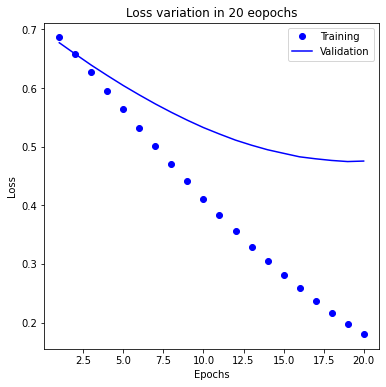

In [ ]:
# plot model Evaluation between traning and testing
# We have 4 values as Evaluation 2 for training and 2 for testing
history_dict = history.history
history_dict.keys()
plt.figure(figsize=(6,6))
loss = history_dict['loss']
val_loss = history_dict['val_loss']
plt.plot(range(1, len(loss) + 1), loss, 'bo', label='Training')
plt.plot(range(1, len(loss) + 1), val_loss, 'b', label='Validation')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss variation in 20 eopochs")
plt.legend()
plt.show()

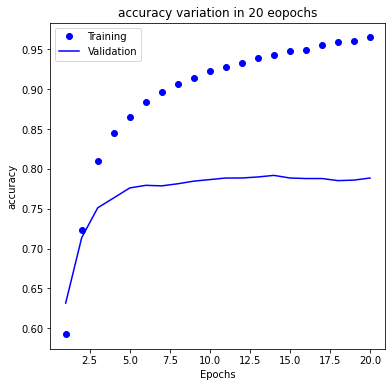

In [ ]:
# plot model Evaluation between traning and testing

plt.figure(figsize=(6,6))
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
plt.plot(range(1, len(val_accuracy) + 1), accuracy, 'bo', label='Training')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, 'b', label='Validation')
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.title("accuracy variation in 20 eopochs")
plt.legend()
plt.show()

In [ ]:
# with 10000 words
df_train = reda_file('train.csv')
text = df_train['text']
text_preProcessing = normalize_corpus(text)
print("Tweets before preprocessing\n", text[:3],  "\n", "#"*50)
print("Tweets after preprocessing\n", text_preProcessing[:3],  "\n", "#"*50)
tok = Tokenizer( num_words=10000 ,oov_token='UNK')
tok.fit_on_texts(text_preProcessing)
binary_bow = tok.texts_to_matrix(text_preProcessing, mode='binary')
print(binary_bow.shape)
y = df_train['target']
y = np.asarray(y).astype('float32')
print(y[:3])
x_train, x_val, y_train, y_val = train_test_split(binary_bow, y, test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
# run binary BOW model
history = BOW_model(x_train, x_val, y_train, y_val, binary_bow.shape[1] )

Tweets before preprocessing
 0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
Name: text, dtype: object 
 ##################################################
Tweets after preprocessing
 ['deed reason earthquake may allah forgive u', 'forest fire near la ronge sask canada', 'resident ask shelter place notify officer evacuation shelter place order expect'] 
 ##################################################
(7613, 10000)
[1. 1. 1.]
(6090, 10000) (6090,)
(1523, 10000) (1523,)
Train on 6090 samples, validate on 1523 samples
Epoch 1/20
6090/6090 [==============================] - 1s 133us/step - loss: 0.6862 - accuracy: 0.6479 - val_loss: 0.6737 - val_accuracy: 0.7603
Epoch 2/20
6090/6090 [==============================] - 1s 116us/step - loss: 0.6568 - accuracy: 0.8263 - val_loss: 0.6494 - val_accuracy: 0.7925
Epoch 3/20
6090/6090 [==============================] - 1s 94us/st

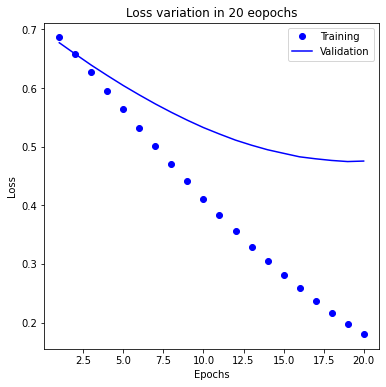

In [ ]:
# plot model Evaluation between traning and testing
# We have 4 values as Evaluation 2 for training and 2 for testing
plt.figure(figsize=(6,6))
loss = history_dict['loss']
val_loss = history_dict['val_loss']
plt.plot(range(1, len(loss) + 1), loss, 'bo', label='Training')
plt.plot(range(1, len(loss) + 1), val_loss, 'b', label='Validation')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss variation in 20 eopochs")
plt.legend()
plt.show()

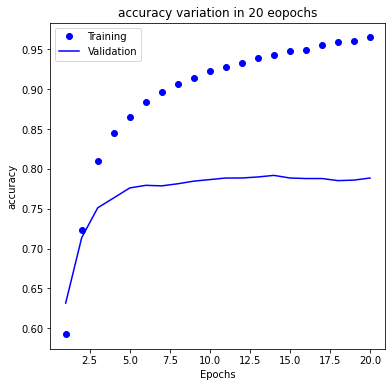

In [ ]:
# plot model Evaluation between traning and testing

plt.figure(figsize=(6,6))
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
plt.plot(range(1, len(val_accuracy) + 1), accuracy, 'bo', label='Training')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, 'b', label='Validation')
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.title("accuracy variation in 20 eopochs")
plt.legend()
plt.show()

In [ ]:
# with 100 words
df_train = reda_file('train.csv')
text = df_train['text']
text_preProcessing = normalize_corpus(text)
print("Tweets before preprocessing\n", text[:3],  "\n", "#"*50)
print("Tweets after preprocessing\n", text_preProcessing[:3],  "\n", "#"*50)
tok = Tokenizer( num_words=100 ,oov_token='UNK')
tok.fit_on_texts(text_preProcessing)
binary_bow = tok.texts_to_matrix(text_preProcessing, mode='binary')
print(binary_bow.shape)
y = df_train['target']
y = np.asarray(y).astype('float32')
print(y[:3])
x_train, x_val, y_train, y_val = train_test_split(binary_bow, y, test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
# run binary BOW model
history = BOW_model(x_train, x_val, y_train, y_val, binary_bow.shape[1] )

Tweets before preprocessing
 0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
Name: text, dtype: object 
 ##################################################
Tweets after preprocessing
 ['deed reason earthquake may allah forgive u', 'forest fire near la ronge sask canada', 'resident ask shelter place notify officer evacuation shelter place order expect'] 
 ##################################################
(7613, 100)
[1. 1. 1.]
(6090, 100) (6090,)
(1523, 100) (1523,)
Train on 6090 samples, validate on 1523 samples
Epoch 1/20
6090/6090 [==============================] - 0s 17us/step - loss: 0.6872 - accuracy: 0.5713 - val_loss: 0.6882 - val_accuracy: 0.5601
Epoch 2/20
6090/6090 [==============================] - 0s 4us/step - loss: 0.6809 - accuracy: 0.5734 - val_loss: 0.6838 - val_accuracy: 0.5627
Epoch 3/20
6090/6090 [==============================] - 0s 5us/step - loss:

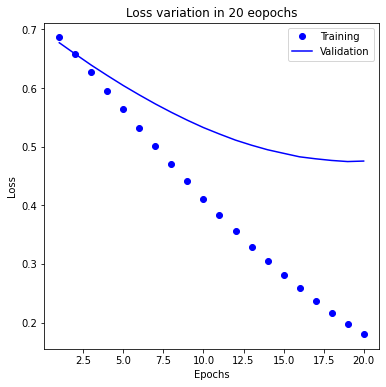

In [ ]:
# plot model Evaluation between traning and testing
# We have 4 values as Evaluation 2 for training and 2 for testing
plt.figure(figsize=(6,6))
loss = history_dict['loss']
val_loss = history_dict['val_loss']
plt.plot(range(1, len(loss) + 1), loss, 'bo', label='Training')
plt.plot(range(1, len(loss) + 1), val_loss, 'b', label='Validation')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss variation in 20 eopochs")
plt.legend()
plt.show()

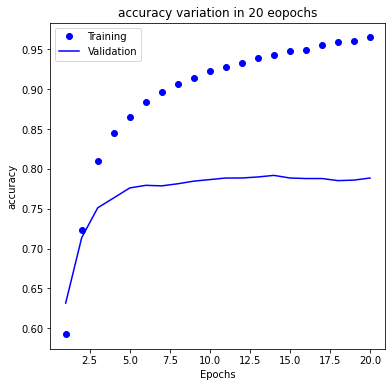

In [ ]:
# plot model Evaluation between traning and testing

plt.figure(figsize=(6,6))
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
plt.plot(range(1, len(val_accuracy) + 1), accuracy, 'bo', label='Training')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, 'b', label='Validation')
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.title("accuracy variation in 20 eopochs")
plt.legend()
plt.show()

In [ ]:
# with all words
df_train = reda_file('train.csv')
text = df_train['text']
text_preProcessing = normalize_corpus(text)
print("Tweets before preprocessing\n", text[:3],  "\n", "#"*50)
print("Tweets after preprocessing\n", text_preProcessing[:3],  "\n", "#"*50)
tok = Tokenizer(oov_token='UNK')
tok.fit_on_texts(text_preProcessing)
count_bow = tok.texts_to_matrix(text_preProcessing, mode='count')
print(count_bow.shape)
y = df_train['target']
y = np.asarray(y).astype('float32')
print(y[:3])
x_train, x_val, y_train, y_val = train_test_split(count_bow, y, test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
# run count BOW model
history = BOW_model(x_train, x_val, y_train, y_val, count_bow.shape[1] )


Tweets before preprocessing
 0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
Name: text, dtype: object 
 ##################################################
Tweets after preprocessing
 ['deed reason earthquake may allah forgive u', 'forest fire near la ronge sask canada', 'resident ask shelter place notify officer evacuation shelter place order expect'] 
 ##################################################
(7613, 19110)
[1. 1. 1.]
(6090, 19110) (6090,)
(1523, 19110) (1523,)
Train on 6090 samples, validate on 1523 samples
Epoch 1/20
6090/6090 [==============================] - 2s 258us/step - loss: 0.6843 - accuracy: 0.6578 - val_loss: 0.6682 - val_accuracy: 0.7682
Epoch 2/20
6090/6090 [==============================] - 1s 195us/step - loss: 0.6451 - accuracy: 0.8557 - val_loss: 0.6386 - val_accuracy: 0.8004
Epoch 3/20
6090/6090 [==============================] - 1s 173us/s

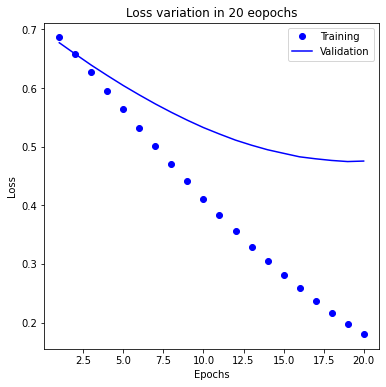

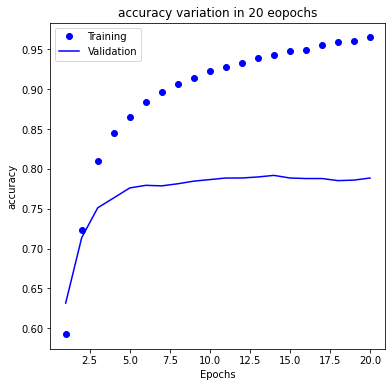

In [ ]:
# plot model Evaluation between traning and testing
# We have 4 values as Evaluation 2 for training and 2 for testing
plt.figure(figsize=(6,6))
loss = history_dict['loss']
val_loss = history_dict['val_loss']
plt.plot(range(1, len(loss) + 1), loss, 'bo', label='Training')
plt.plot(range(1, len(loss) + 1), val_loss, 'b', label='Validation')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss variation in 20 eopochs")
plt.legend()
plt.show()

# plot model Evaluation between traning and testing

plt.figure(figsize=(6,6))
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
plt.plot(range(1, len(val_accuracy) + 1), accuracy, 'bo', label='Training')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, 'b', label='Validation')
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.title("accuracy variation in 20 eopochs")
plt.legend()
plt.show()

In [ ]:
# with 10000 words
df_train = reda_file('train.csv')
text = df_train['text']
text_preProcessing = normalize_corpus(text)
print("Tweets before preprocessing\n", text[:3],  "\n", "#"*50)
print("Tweets after preprocessing\n", text_preProcessing[:3],  "\n", "#"*50)
tok = Tokenizer(num_words=10000, oov_token='UNK')
tok.fit_on_texts(text_preProcessing)
count_bow = tok.texts_to_matrix(text_preProcessing, mode='count')
print(count_bow.shape)
y = df_train['target']
y = np.asarray(y).astype('float32')
print(y[:3])
x_train, x_val, y_train, y_val = train_test_split(count_bow, y, test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
# run count BOW model
history = BOW_model(x_train, x_val, y_train, y_val, count_bow.shape[1] )


Tweets before preprocessing
 0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
Name: text, dtype: object 
 ##################################################
Tweets after preprocessing
 ['deed reason earthquake may allah forgive u', 'forest fire near la ronge sask canada', 'resident ask shelter place notify officer evacuation shelter place order expect'] 
 ##################################################
(7613, 10000)
[1. 1. 1.]
(6090, 10000) (6090,)
(1523, 10000) (1523,)
Train on 6090 samples, validate on 1523 samples
Epoch 1/20
6090/6090 [==============================] - 1s 98us/step - loss: 0.6870 - accuracy: 0.6194 - val_loss: 0.6730 - val_accuracy: 0.7498
Epoch 2/20
6090/6090 [==============================] - 0s 79us/step - loss: 0.6552 - accuracy: 0.8269 - val_loss: 0.6461 - val_accuracy: 0.7722
Epoch 3/20
6090/6090 [==============================] - 0s 80us/step

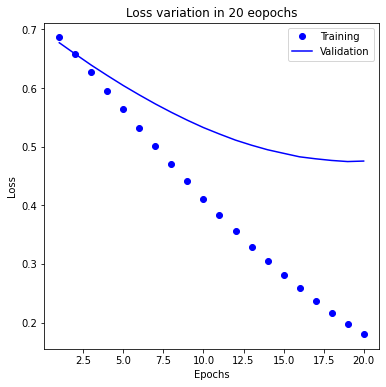

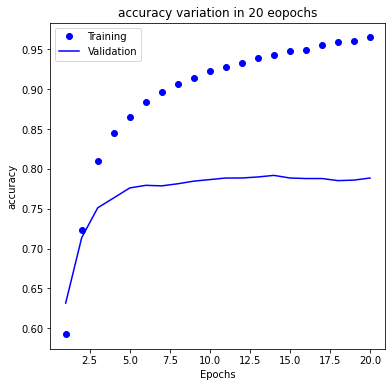

In [ ]:
# plot model Evaluation between traning and testing
# We have 4 values as Evaluation 2 for training and 2 for testing
plt.figure(figsize=(6,6))
loss = history_dict['loss']
val_loss = history_dict['val_loss']
plt.plot(range(1, len(loss) + 1), loss, 'bo', label='Training')
plt.plot(range(1, len(loss) + 1), val_loss, 'b', label='Validation')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss variation in 20 eopochs")
plt.legend()
plt.show()

# plot model Evaluation between traning and testing

plt.figure(figsize=(6,6))
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
plt.plot(range(1, len(val_accuracy) + 1), accuracy, 'bo', label='Training')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, 'b', label='Validation')
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.title("accuracy variation in 20 eopochs")
plt.legend()
plt.show()

In [ ]:
# with 100 words
df_train = reda_file('train.csv')
text = df_train['text']
text_preProcessing = normalize_corpus(text)
print("Tweets before preprocessing\n", text[:3],  "\n", "#"*50)
print("Tweets after preprocessing\n", text_preProcessing[:3],  "\n", "#"*50)
tok = Tokenizer(num_words=100, oov_token='UNK')
tok.fit_on_texts(text_preProcessing)
count_bow = tok.texts_to_matrix(text_preProcessing, mode='count')
print(count_bow.shape)
y = df_train['target']
y = np.asarray(y).astype('float32')
print(y[:3])
x_train, x_val, y_train, y_val = train_test_split(count_bow, y, test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
# run count BOW model
history = BOW_model(x_train, x_val, y_train, y_val, count_bow.shape[1] )


Tweets before preprocessing
 0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
Name: text, dtype: object 
 ##################################################
Tweets after preprocessing
 ['deed reason earthquake may allah forgive u', 'forest fire near la ronge sask canada', 'resident ask shelter place notify officer evacuation shelter place order expect'] 
 ##################################################
(7613, 100)
[1. 1. 1.]
(6090, 100) (6090,)
(1523, 100) (1523,)
Train on 6090 samples, validate on 1523 samples
Epoch 1/20
6090/6090 [==============================] - 0s 25us/step - loss: 0.6872 - accuracy: 0.5703 - val_loss: 0.6856 - val_accuracy: 0.5719
Epoch 2/20
6090/6090 [==============================] - 0s 4us/step - loss: 0.6821 - accuracy: 0.5885 - val_loss: 0.6820 - val_accuracy: 0.5758
Epoch 3/20
6090/6090 [==============================] - 0s 4us/step - loss:

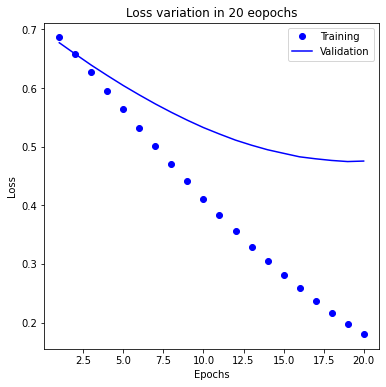

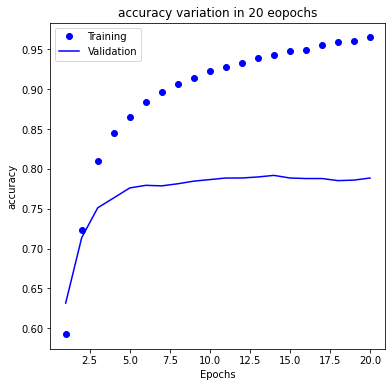

In [ ]:
# plot model Evaluation between traning and testing
# We have 4 values as Evaluation 2 for training and 2 for testing
plt.figure(figsize=(6,6))
loss = history_dict['loss']
val_loss = history_dict['val_loss']
plt.plot(range(1, len(loss) + 1), loss, 'bo', label='Training')
plt.plot(range(1, len(loss) + 1), val_loss, 'b', label='Validation')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss variation in 20 eopochs")
plt.legend()
plt.show()

# plot model Evaluation between traning and testing

plt.figure(figsize=(6,6))
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
plt.plot(range(1, len(val_accuracy) + 1), accuracy, 'bo', label='Training')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, 'b', label='Validation')
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.title("accuracy variation in 20 eopochs")
plt.legend()
plt.show()

In [ ]:
# with all words
df_train = reda_file('train.csv')
text = df_train['text']
text_preProcessing = normalize_corpus(text)
print("Tweets before preprocessing\n", text[:3],  "\n", "#"*50)
print("Tweets after preprocessing\n", text_preProcessing[:3],  "\n", "#"*50)
tok = Tokenizer(oov_token='UNK')
tok.fit_on_texts(text_preProcessing)
count_bow = tok.texts_to_matrix(text_preProcessing, mode='tfidf')
print(count_bow.shape)
y = df_train['target']
y = np.asarray(y).astype('float32')
print(y[:3])
x_train, x_val, y_train, y_val = train_test_split(count_bow, y, test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
# run count BOW model
history = BOW_model(x_train, x_val, y_train, y_val, count_bow.shape[1] )


Tweets before preprocessing
 0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
Name: text, dtype: object 
 ##################################################
Tweets after preprocessing
 ['deed reason earthquake may allah forgive u', 'forest fire near la ronge sask canada', 'resident ask shelter place notify officer evacuation shelter place order expect'] 
 ##################################################
(7613, 19110)
[1. 1. 1.]
(6090, 19110) (6090,)
(1523, 19110) (1523,)
Train on 6090 samples, validate on 1523 samples
Epoch 1/20
6090/6090 [==============================] - 1s 204us/step - loss: 0.6814 - accuracy: 0.5186 - val_loss: 0.6548 - val_accuracy: 0.6231
Epoch 2/20
6090/6090 [==============================] - 1s 228us/step - loss: 0.6035 - accuracy: 0.8085 - val_loss: 0.6178 - val_accuracy: 0.6553
Epoch 3/20
6090/6090 [==============================] - 1s 180us/s

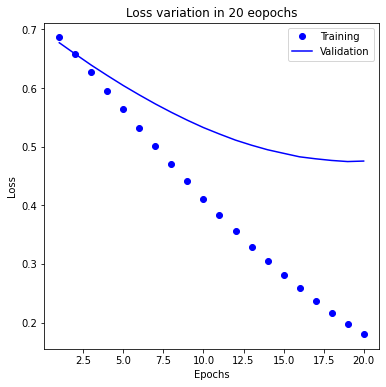

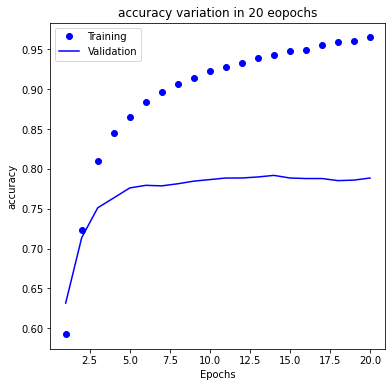

In [ ]:
# plot model Evaluation between traning and testing
# We have 4 values as Evaluation 2 for training and 2 for testing
plt.figure(figsize=(6,6))
loss = history_dict['loss']
val_loss = history_dict['val_loss']
plt.plot(range(1, len(loss) + 1), loss, 'bo', label='Training')
plt.plot(range(1, len(loss) + 1), val_loss, 'b', label='Validation')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss variation in 20 eopochs")
plt.legend()
plt.show()

# plot model Evaluation between traning and testing

plt.figure(figsize=(6,6))
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
plt.plot(range(1, len(val_accuracy) + 1), accuracy, 'bo', label='Training')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, 'b', label='Validation')
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.title("accuracy variation in 20 eopochs")
plt.legend()
plt.show()

In [ ]:
# with 10000 words
df_train = reda_file('train.csv')
text = df_train['text']
text_preProcessing = normalize_corpus(text)
print("Tweets before preprocessing\n", text[:3],  "\n", "#"*50)
print("Tweets after preprocessing\n", text_preProcessing[:3],  "\n", "#"*50)
tok = Tokenizer(num_words=10000, oov_token='UNK')
tok.fit_on_texts(text_preProcessing)
count_bow = tok.texts_to_matrix(text_preProcessing, mode='tfidf')
print(count_bow.shape)
y = df_train['target']
y = np.asarray(y).astype('float32')
print(y[:3])
x_train, x_val, y_train, y_val = train_test_split(count_bow, y, test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
# run count BOW model
history = BOW_model(x_train, x_val, y_train, y_val, count_bow.shape[1] )


Tweets before preprocessing
 0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
Name: text, dtype: object 
 ##################################################
Tweets after preprocessing
 ['deed reason earthquake may allah forgive u', 'forest fire near la ronge sask canada', 'resident ask shelter place notify officer evacuation shelter place order expect'] 
 ##################################################
(7613, 10000)
[1. 1. 1.]
(6090, 10000) (6090,)
(1523, 10000) (1523,)
Train on 6090 samples, validate on 1523 samples
Epoch 1/20
6090/6090 [==============================] - 1s 97us/step - loss: 0.6657 - accuracy: 0.5910 - val_loss: 0.6274 - val_accuracy: 0.6369
Epoch 2/20
6090/6090 [==============================] - 0s 78us/step - loss: 0.5692 - accuracy: 0.7095 - val_loss: 0.5867 - val_accuracy: 0.7216
Epoch 3/20
6090/6090 [==============================] - 0s 78us/step

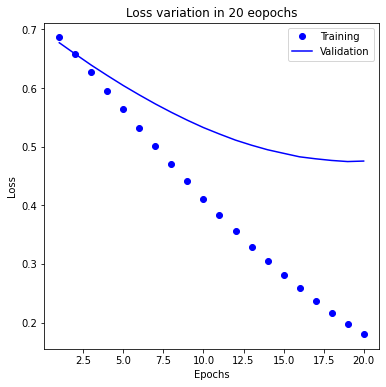

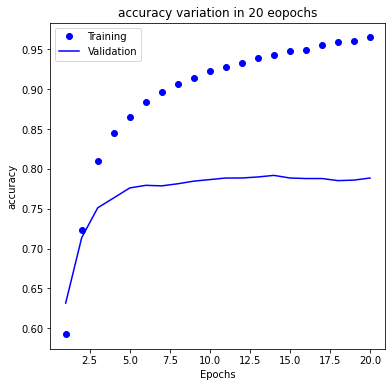

In [ ]:
# plot model Evaluation between traning and testing
# We have 4 values as Evaluation 2 for training and 2 for testing
plt.figure(figsize=(6,6))
loss = history_dict['loss']
val_loss = history_dict['val_loss']
plt.plot(range(1, len(loss) + 1), loss, 'bo', label='Training')
plt.plot(range(1, len(loss) + 1), val_loss, 'b', label='Validation')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss variation in 20 eopochs")
plt.legend()
plt.show()

# plot model Evaluation between traning and testing

plt.figure(figsize=(6,6))
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
plt.plot(range(1, len(val_accuracy) + 1), accuracy, 'bo', label='Training')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, 'b', label='Validation')
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.title("accuracy variation in 20 eopochs")
plt.legend()
plt.show()

In [ ]:
# with 100 words
df_train = reda_file('train.csv')
text = df_train['text']
text_preProcessing = normalize_corpus(text)
print("Tweets before preprocessing\n", text[:3],  "\n", "#"*50)
print("Tweets after preprocessing\n", text_preProcessing[:3],  "\n", "#"*50)
tok = Tokenizer(num_words=100, oov_token='UNK')
tok.fit_on_texts(text_preProcessing)
count_bow = tok.texts_to_matrix(text_preProcessing, mode='tfidf')
print(count_bow.shape)
y = df_train['target']
y = np.asarray(y).astype('float32')
print(y[:3])
x_train, x_val, y_train, y_val = train_test_split(count_bow, y, test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
# run count BOW model
history = BOW_model(x_train, x_val, y_train, y_val, count_bow.shape[1] )


Tweets before preprocessing
 0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
Name: text, dtype: object 
 ##################################################
Tweets after preprocessing
 ['deed reason earthquake may allah forgive u', 'forest fire near la ronge sask canada', 'resident ask shelter place notify officer evacuation shelter place order expect'] 
 ##################################################
(7613, 100)
[1. 1. 1.]
(6090, 100) (6090,)
(1523, 100) (1523,)
Train on 6090 samples, validate on 1523 samples
Epoch 1/20
6090/6090 [==============================] - 0s 21us/step - loss: 1.1639 - accuracy: 0.5660 - val_loss: 0.9107 - val_accuracy: 0.5870
Epoch 2/20
6090/6090 [==============================] - 0s 4us/step - loss: 0.8699 - accuracy: 0.5655 - val_loss: 0.7507 - val_accuracy: 0.5870
Epoch 3/20
6090/6090 [==============================] - 0s 4us/step - loss:

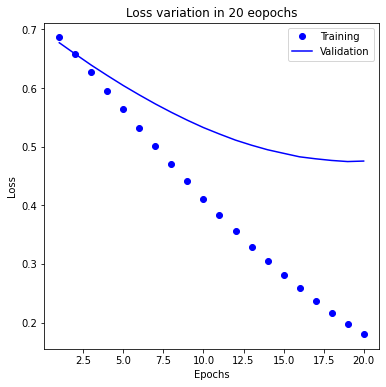

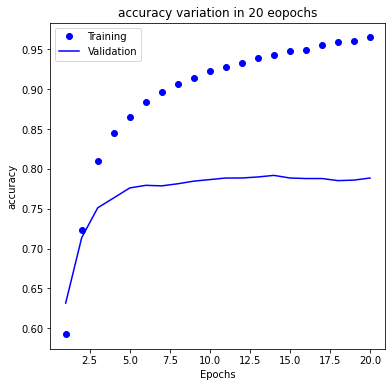

In [ ]:
# plot model Evaluation between traning and testing
# We have 4 values as Evaluation 2 for training and 2 for testing
plt.figure(figsize=(6,6))
loss = history_dict['loss']
val_loss = history_dict['val_loss']
plt.plot(range(1, len(loss) + 1), loss, 'bo', label='Training')
plt.plot(range(1, len(loss) + 1), val_loss, 'b', label='Validation')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss variation in 20 eopochs")
plt.legend()
plt.show()

# plot model Evaluation between traning and testing

plt.figure(figsize=(6,6))
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
plt.plot(range(1, len(val_accuracy) + 1), accuracy, 'bo', label='Training')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, 'b', label='Validation')
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.title("accuracy variation in 20 eopochs")
plt.legend()
plt.show()

#Using Countvectorizer of sklearn

In [ ]:
def count_vectorize(df):
    '''
    Argumen:
        df dataframe of multiple text
    return:
        CountVectorizer Model that work as BOW but instead it give count number of the word presented in its document
    '''
# I fit the vector to all of the data
    vectorizer = CountVectorizer()
    vectorize = vectorizer.fit(df) 
    return vectorizer

In [ ]:
df_train = reda_file('train.csv')
text = df_train['text']
text_preProcessing = normalize_corpus(text)
print("Tweets before preprocessing\n", text[:3],  "\n", "#"*50)
print("Tweets after preprocessing\n", text_preProcessing[:3],  "\n", "#"*50)
y = df_train['target']
y = np.asarray(y).astype('float32')
print(y[:3])
x_train, x_val, y_train, y_val = train_test_split(text_preProcessing, y, test_size=0.2)
print(len(x_train))
print(len(x_val))
print(len(y_train))
print(len(y_val))

Tweets before preprocessing
 0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
Name: text, dtype: object 
 ##################################################
Tweets after preprocessing
 ['deed reason earthquake may allah forgive u', 'forest fire near la ronge sask canada', 'resident ask shelter place notify officer evacuation shelter place order expect'] 
 ##################################################
[1. 1. 1.]
6090
1523
6090
1523


In [ ]:
count_vect = count_vectorize(text_preProcessing)
cv_x_train, cv_x_val = count_vect.transform(x_train), count_vect.transform(x_val)
cv_x_train, cv_x_val = cv_x_train.toarray(), cv_x_val.toarray()


In [ ]:
print(cv_x_train.shape) 

(6090, 19085)


In [ ]:
# run with the CV 
history = BOW_model(cv_x_train, cv_x_val, y_train, y_val, cv_x_train.shape[1])

Train on 6090 samples, validate on 1523 samples
Epoch 1/20
6090/6090 [==============================] - 1s 187us/step - loss: 0.6858 - accuracy: 0.6525 - val_loss: 0.6733 - val_accuracy: 0.7360
Epoch 2/20
6090/6090 [==============================] - 1s 172us/step - loss: 0.6534 - accuracy: 0.8215 - val_loss: 0.6483 - val_accuracy: 0.7794
Epoch 3/20
6090/6090 [==============================] - 1s 173us/step - loss: 0.6158 - accuracy: 0.8675 - val_loss: 0.6252 - val_accuracy: 0.7905
Epoch 4/20
6090/6090 [==============================] - 1s 224us/step - loss: 0.5783 - accuracy: 0.8893 - val_loss: 0.6034 - val_accuracy: 0.7945
Epoch 5/20
6090/6090 [==============================] - 1s 222us/step - loss: 0.5411 - accuracy: 0.9013 - val_loss: 0.5828 - val_accuracy: 0.7938
Epoch 6/20
6090/6090 [==============================] - 1s 183us/step - loss: 0.5048 - accuracy: 0.9092 - val_loss: 0.5635 - val_accuracy: 0.7958
Epoch 7/20
6090/6090 [==============================] - 1s 200us/step - loss

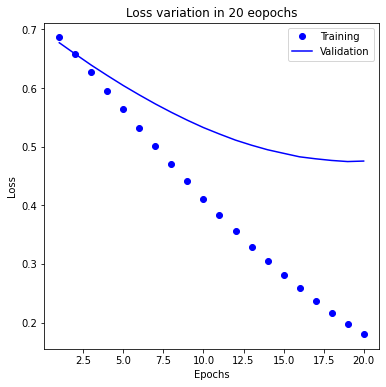

In [ ]:
# plot model Evaluation between traning and testing

plt.figure(figsize=(6,6))
loss = history_dict['loss']
val_loss = history_dict['val_loss']
plt.plot(range(1, len(loss) + 1), loss, 'bo', label='Training')
plt.plot(range(1, len(loss) + 1), val_loss, 'b', label='Validation')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss variation in 20 eopochs")
plt.legend()
plt.show()

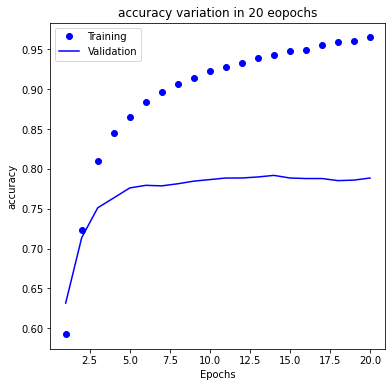

In [ ]:
# plot model Evaluation between traning and testing

plt.figure(figsize=(6,6))
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
plt.plot(range(1, len(val_accuracy) + 1), accuracy, 'bo', label='Training')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, 'b', label='Validation')
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.title("accuracy variation in 20 eopochs")
plt.legend()
plt.show()

#Using TF_IDF of sklearn

In [ ]:
def tfidf_vectorizer(df):
    '''
    Argumen:
        df dataframe of multiple reviews
    return:
        Train & test arrays that can feed to the model
    '''
# I fit the vector to all of the data
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_vectorizer = tfidf_vectorizer.fit(df) 
    word_idf_weights = tfidf_vectorizer.idf_
    print("Our 10 words weights\n\n",word_idf_weights[:10])
    return tfidf_vectorizer

In [ ]:
df_train = reda_file('train.csv')
text = df_train['text']
text_preProcessing = normalize_corpus(text)
print("Tweets before preprocessing\n", text[:3],  "\n", "#"*50)
print("Tweets after preprocessing\n", text_preProcessing[:3],  "\n", "#"*50)
y = df_train['target']
y = np.asarray(y).astype('float32')
print(y[:3])
x_train, x_val, y_train, y_val = train_test_split(text_preProcessing, y, test_size=0.2)
print(len(x_train))
print(len(x_val))
print(len(y_train))
print(len(y_val))

Tweets before preprocessing
 0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
Name: text, dtype: object 
 ##################################################
Tweets after preprocessing
 ['deed reason earthquake may allah forgive u', 'forest fire near la ronge sask canada', 'resident ask shelter place notify officer evacuation shelter place order expect'] 
 ##################################################
[1. 1. 1.]
6090
1523
6090
1523


In [ ]:
tfidf_vectorizer = tfidf_vectorizer(text_preProcessing)
tfidf_x_train, tfidf_x_val = tfidf_vectorizer.transform(x_train), tfidf_vectorizer.transform(x_val)
tfidf_x_train, tfidf_x_val = tfidf_x_train.toarray(), tfidf_x_val.toarray()
print(tfidf_x_train[0, :30]) # it normalize the values to be between 0 and 1
print(tfidf_x_train.shape)

Our 10 words weights

 [8.32830602 9.24459676 9.24459676 9.24459676 9.24459676 9.24459676
 9.24459676 9.24459676 9.24459676 9.24459676]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
(6090, 19085)


In [ ]:
# run the model TF-IDF vectorizer
history = BOW_model(tfidf_x_train, tfidf_x_val, y_train, y_val, tfidf_x_train.shape[1])

Train on 6090 samples, validate on 1523 samples
Epoch 1/20
6090/6090 [==============================] - 1s 177us/step - loss: 0.6883 - accuracy: 0.5755 - val_loss: 0.6821 - val_accuracy: 0.6060
Epoch 2/20
6090/6090 [==============================] - 1s 223us/step - loss: 0.6698 - accuracy: 0.7256 - val_loss: 0.6686 - val_accuracy: 0.7249
Epoch 3/20
6090/6090 [==============================] - 1s 226us/step - loss: 0.6483 - accuracy: 0.8194 - val_loss: 0.6565 - val_accuracy: 0.7590
Epoch 4/20
6090/6090 [==============================] - 1s 226us/step - loss: 0.6269 - accuracy: 0.8534 - val_loss: 0.6444 - val_accuracy: 0.7768
Epoch 5/20
6090/6090 [==============================] - 1s 201us/step - loss: 0.6049 - accuracy: 0.8750 - val_loss: 0.6323 - val_accuracy: 0.7846
Epoch 6/20
6090/6090 [==============================] - 1s 189us/step - loss: 0.5822 - accuracy: 0.8882 - val_loss: 0.6198 - val_accuracy: 0.7840
Epoch 7/20
6090/6090 [==============================] - 1s 182us/step - loss

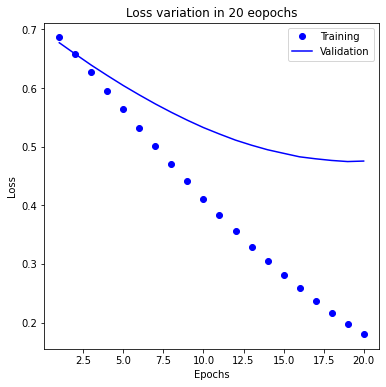

In [ ]:
# plot model Evaluation between traning and testing

plt.figure(figsize=(6,6))
loss = history_dict['loss']
val_loss = history_dict['val_loss']
plt.plot(range(1, len(loss) + 1), loss, 'bo', label='Training')
plt.plot(range(1, len(loss) + 1), val_loss, 'b', label='Validation')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss variation in 20 eopochs")
plt.legend()
plt.show()

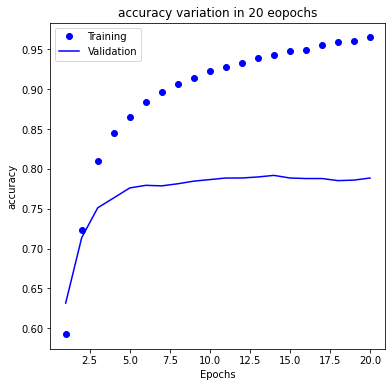

In [ ]:
# plot model Evaluation between traning and testing

plt.figure(figsize=(6,6))
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
plt.plot(range(1, len(val_accuracy) + 1), accuracy, 'bo', label='Training')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, 'b', label='Validation')
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.title("accuracy variation in 20 eopochs")
plt.legend()
plt.show()

#Using Binary BOW built by us

In [ ]:
def build_vocab(text_list):
  '''
  Argument:
    List of strings
  Return:
    list of tokenizer strings and all of uniqe vocab
  '''
  # using nltk word_tokenize and convert each sentence(tweet) to list of words
  df_text_tokenized = [word_tokenize(text) for text in text_list]
  print(df_text_tokenized, "\n", "#"*50)
  # Expand all of words in all of sentence(tweets) in one list
  word_vocab = list([item for sublist in df_text_tokenized for item in sublist])
  print(word_vocab, "\n", "#"*50)
  print("Before Get uniqe vocab",len(word_vocab), "\n", "#"*50)
  word_vocab = list((set(word_vocab))) # if we sort these unique words model will be less accurate
  print(word_vocab, "\n", "#"*50)
  print("Atfer Get uniqe vocab",len(word_vocab), "\n", "#"*50)
  return df_text_tokenized, word_vocab
df_train = reda_file('train.csv')
text = df_train['text']
df_text_tokenized, word_vocab = build_vocab(text)

[['Our', 'Deeds', 'are', 'the', 'Reason', 'of', 'this', '#', 'earthquake', 'May', 'ALLAH', 'Forgive', 'us', 'all'], ['Forest', 'fire', 'near', 'La', 'Ronge', 'Sask', '.', 'Canada'], ['All', 'residents', 'asked', 'to', "'shelter", 'in', 'place', "'", 'are', 'being', 'notified', 'by', 'officers', '.', 'No', 'other', 'evacuation', 'or', 'shelter', 'in', 'place', 'orders', 'are', 'expected'], ['13,000', 'people', 'receive', '#', 'wildfires', 'evacuation', 'orders', 'in', 'California'], ['Just', 'got', 'sent', 'this', 'photo', 'from', 'Ruby', '#', 'Alaska', 'as', 'smoke', 'from', '#', 'wildfires', 'pours', 'into', 'a', 'school'], ['#', 'RockyFire', 'Update', '=', '>', 'California', 'Hwy', '.', '20', 'closed', 'in', 'both', 'directions', 'due', 'to', 'Lake', 'County', 'fire', '-', '#', 'CAfire', '#', 'wildfires'], ['#', 'flood', '#', 'disaster', 'Heavy', 'rain', 'causes', 'flash', 'flooding', 'of', 'streets', 'in', 'Manitou', ',', 'Colorado', 'Springs', 'areas'], ['I', "'m", 'on', 'top', 'of

In [ ]:
# map words to indexes to present each word in our vocab to uniqe index
dict_word_vocab = dict([(key, val) for (val , key) in enumerate(word_vocab)])
print(dict_word_vocab)

{'Peel': 0, 'WWI': 1, 'Pre': 2, 'Panicking': 3, 'Parents': 4, 'puny': 5, '1.43': 6, '//t.co/HHPvPaEL4n': 7, 'Loretta': 8, 'Cam': 9, 'ika': 10, 'circle': 11, 'FreeAmirNow': 12, 'oth': 13, 'Disco': 14, 'Men': 15, 'kyrikoni': 16, 'Encounters': 17, 'Shark\x89Û\x9d': 18, 'your': 19, '//t.co/QZlPFHpwDO': 20, 'Sanders': 21, 'pleasantly': 22, 'gives': 23, 'Patrick': 24, 'Gargron': 25, 'Sunk': 26, 'nffc': 27, '//t.co/d5h4jif1y3': 28, 'begins..': 29, 'Browser': 30, 'Iranian': 31, 'ignore': 32, 'TWENTY-SIX': 33, 'prepare': 34, 'attack..close': 35, '//t.co/dVONWIv3l1': 36, 'delta': 37, 'Song': 38, 'thousands': 39, 'regarding': 40, 'Cameroon': 41, 'erally': 42, 'Heaven': 43, 'slams': 44, 'skynet': 45, '\x89Û÷food': 46, 'deluded': 47, 'Ce': 48, '140': 49, 'FIELDSTONE': 50, 'shedid': 51, 'SRs': 52, 'waters-land': 53, '//t.co/o6oNSjHCsD': 54, 'qZLOreMfT': 55, 'Rory': 56, 'Cross': 57, 'green': 58, 'rebelled': 59, 'news': 60, 'CW_Hoops': 61, 'Gusts': 62, 'paths': 63, 'Wattle': 64, '53inch': 65, '//t.co/

In [ ]:
print(df_text_tokenized)

[['Our', 'Deeds', 'are', 'the', 'Reason', 'of', 'this', '#', 'earthquake', 'May', 'ALLAH', 'Forgive', 'us', 'all'], ['Forest', 'fire', 'near', 'La', 'Ronge', 'Sask', '.', 'Canada'], ['All', 'residents', 'asked', 'to', "'shelter", 'in', 'place', "'", 'are', 'being', 'notified', 'by', 'officers', '.', 'No', 'other', 'evacuation', 'or', 'shelter', 'in', 'place', 'orders', 'are', 'expected'], ['13,000', 'people', 'receive', '#', 'wildfires', 'evacuation', 'orders', 'in', 'California'], ['Just', 'got', 'sent', 'this', 'photo', 'from', 'Ruby', '#', 'Alaska', 'as', 'smoke', 'from', '#', 'wildfires', 'pours', 'into', 'a', 'school'], ['#', 'RockyFire', 'Update', '=', '>', 'California', 'Hwy', '.', '20', 'closed', 'in', 'both', 'directions', 'due', 'to', 'Lake', 'County', 'fire', '-', '#', 'CAfire', '#', 'wildfires'], ['#', 'flood', '#', 'disaster', 'Heavy', 'rain', 'causes', 'flash', 'flooding', 'of', 'streets', 'in', 'Manitou', ',', 'Colorado', 'Springs', 'areas'], ['I', "'m", 'on', 'top', 'of

In [ ]:
def bulid_binary_BOW(text_list, dict_word_vocab):
  '''
  Argument:
    text_list: list of all text each of them as one string of vocabs 
    dict_word_vocab: dictionary that map your unique words to indexes
  reutrn:
    list of lists each of contain index of each word
  '''
  # for each word in the sentence get its index
  text_list_indexes = [[dict_word_vocab[word] for word in text]  for text in text_list]

  # code in simple way
  # for text in text_list:
  #   indexes = []
  #   for word in text:
  #     indexes.append(dict_word_vocab[word])
  #   text_list_indexes.append(indexes)
  return text_list_indexes
text_list_indexes = bulid_binary_BOW(df_text_tokenized, dict_word_vocab)
print(len(text_list_indexes))
text_list_indexes[1]

7613


[1404, 14438, 6820, 22553, 1161, 6335, 3867, 1568]

In [ ]:
def vectorize_sequences(seqences, dict_word_vocab):
  '''
  Argument:
    seqence: of lists each of them is list of indexes that reflect the index of the word in our dict vocab
    dimension: Our uniqe vocab size
  return:
    BOW_features: 2-d numby array that map words to (0, 1) as binary BOW model.
  '''
  BOW_features = np.zeros((len(seqences), len(dict_word_vocab)))
  for i, seqence in enumerate(seqences):
    BOW_features[i, seqence] = 1
  return BOW_features
BOW_features = vectorize_sequences(text_list_indexes, dict_word_vocab)

In [ ]:
print("The BOW Binary Model shape is: ", BOW_features.shape)
BOW_features[:5]

The BOW Binary Model shape is:  (7613, 27291)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X = BOW_features
y = np.array(list(df_train['target']))
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
print(len(x_train))
print(len(x_val))
print(len(y_train))
print(len(y_val))

6090
1523
6090
1523


In [ ]:
# run the model
history = BOW_model(x_train, x_val, y_train, y_val, len(dict_word_vocab) )

Train on 6090 samples, validate on 1523 samples
Epoch 1/20
6090/6090 [==============================] - 2s 302us/step - loss: 0.6784 - accuracy: 0.6297 - val_loss: 0.6562 - val_accuracy: 0.7242
Epoch 2/20
6090/6090 [==============================] - 2s 341us/step - loss: 0.6289 - accuracy: 0.7869 - val_loss: 0.6249 - val_accuracy: 0.7557
Epoch 3/20
6090/6090 [==============================] - 2s 337us/step - loss: 0.5806 - accuracy: 0.8356 - val_loss: 0.5995 - val_accuracy: 0.7597
Epoch 4/20
6090/6090 [==============================] - 2s 338us/step - loss: 0.5363 - accuracy: 0.8598 - val_loss: 0.5773 - val_accuracy: 0.7708
Epoch 5/20
6090/6090 [==============================] - 2s 262us/step - loss: 0.4951 - accuracy: 0.8757 - val_loss: 0.5578 - val_accuracy: 0.7794
Epoch 6/20
6090/6090 [==============================] - 2s 283us/step - loss: 0.4560 - accuracy: 0.8915 - val_loss: 0.5404 - val_accuracy: 0.7879
Epoch 7/20
6090/6090 [==============================] - 2s 284us/step - loss